In [1]:
%pylab inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


# Importing credit card data

In [17]:
df = pd.read_csv('CC GENERAL.csv')
df.dtypes
df.drop(['CUST_ID'], axis=1, inplace=True)
df.fillna(0, inplace=True)

# Calculating KPI's

In [18]:
df['MONTHLY_AVG_PURCHASE'] = df['PURCHASES']/df['TENURE']
df['MONTHLY_AVG_CASH_ADVANCE'] = df['CASH_ADVANCE']/df['TENURE']
df['PURCHASE_TYPE_OFF_PAY'] = np.where(df['ONEOFF_PURCHASES']>0,1,0)
df['PURCHASE_TYPE_INSTALLMENT'] = np.where(df['INSTALLMENTS_PURCHASES']>0,1,0)
df['PURCHASE_TYPE_BOTH'] = np.where(df['PURCHASE_TYPE_OFF_PAY']+df['PURCHASE_TYPE_INSTALLMENT'] > 2,1,0)
df['LIMIT_USAGE'] = np.where(df['CREDIT_LIMIT']== 0, 0,df['BALANCE']/df['CREDIT_LIMIT'])
df['PAYMENT_RATIO'] = np.where(df['MINIMUM_PAYMENTS']== 0, 0, df['PAYMENTS']/df['MINIMUM_PAYMENTS'])

In [19]:
df1 = df.iloc[:,[10, 11, 17, 18, 19, 20, 21, 22, 23]]
df1.head()

,CASH_ADVANCE_TRX,PURCHASES_TRX,MONTHLY_AVG_PURCHASE,MONTHLY_AVG_CASH_ADVANCE,PURCHASE_TYPE_OFF_PAY,PURCHASE_TYPE_INSTALLMENT,PURCHASE_TYPE_BOTH,LIMIT_USAGE,PAYMENT_RATIO
0,0,2,7.950000,0.000000,0,1,0,0.040901,1.446508
1,4,0,0.000000,536.912124,0,0,0,0.457495,3.826241
2,0,12,64.430833,0.000000,1,0,0,0.332687,0.991682
3,1,1,124.916667,17.149001,1,0,0,0.222223,0.000000
4,0,1,1.333333,0.000000,1,0,0,0.681429,2.771075


Text(0,0.5,'Cummulative Explained Variance Ratio')

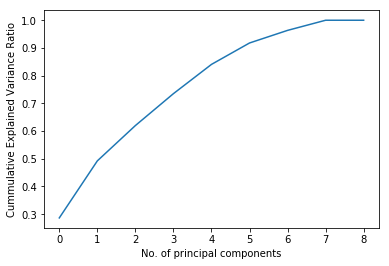

In [20]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler().fit_transform(df1)
from sklearn.decomposition import PCA
pc = PCA(n_components=9).fit(sc)
p = Series(pc.explained_variance_ratio_.cumsum()).plot()
p.set_xlabel('No. of principal components')
p.set_ylabel('Cummulative Explained Variance Ratio')

Text(0,0.5,'PC_2')

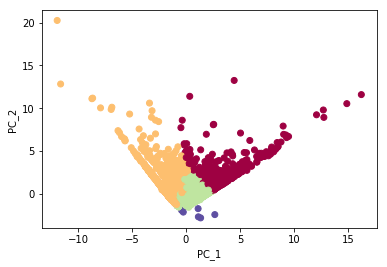

In [21]:
pc = PCA(n_components=8, random_state=125).fit_transform(sc)
from sklearn.cluster import KMeans, DBSCAN
km = KMeans(n_clusters=4, random_state=185).fit(pc)
plt.scatter(pc[:,0], pc[:,1], c=km.labels_, cmap='Spectral')
plt.xlabel('PC_1')
plt.ylabel('PC_2')

# Evaluating the optimum no. of clusters

In [22]:
from sklearn.metrics import silhouette_score, calinski_harabaz_score

In [23]:
# calculate SC for K=2 through K=10
k_range = range(2, 10)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=1)
    km.fit_transform(pc)
    scores.append(silhouette_score(pc,km.labels_))

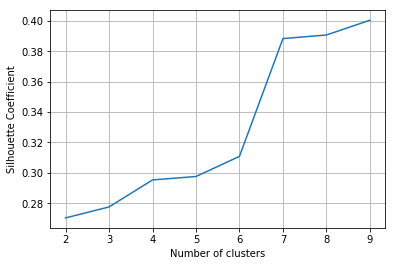

In [24]:
# plot the results
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

In [25]:
# calculate SC for K=2 through K=10
k_range = range(2, 10)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=1)
    km.fit_transform(pc)
    scores.append(calinski_harabaz_score(pc,km.labels_))

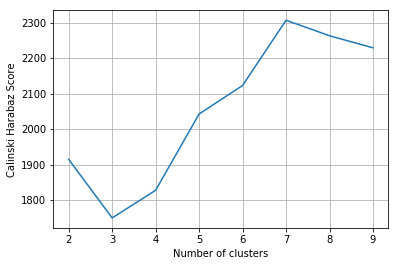

In [26]:
# plot the results
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Calinski Harabaz Score')
plt.grid(True)

In [27]:
# calculate SC for K=2 through K=10
k_range = range(2, 10)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=1)
    km.fit_transform(pc)
    scores.append(km.inertia_)

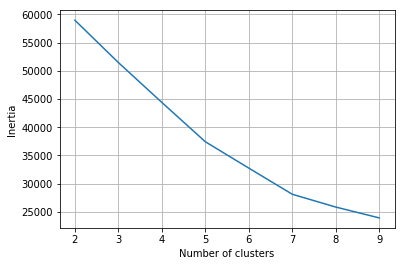

In [28]:
# plot the results
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.grid(True)

In [29]:
km = KMeans(n_clusters=4, random_state=125).fit(pc)
df1['cluster']=km.labels_
df1.groupby('cluster').mean().T

C:\Users\Mayur Maheshwari\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


cluster,0,1,2,3
CASH_ADVANCE_TRX,2.925007,1.710372,1.040840,18.870702
PURCHASES_TRX,3.096586,87.446184,16.336989,8.737276
MONTHLY_AVG_PURCHASE,29.643248,561.221056,80.038371,54.927106
MONTHLY_AVG_CASH_ADVANCE,78.155497,44.525971,25.511637,545.314894
PURCHASE_TYPE_OFF_PAY,0.496936,0.974560,0.492649,0.462173
PURCHASE_TYPE_INSTALLMENT,0.000000,0.943249,1.000000,0.367263
PURCHASE_TYPE_BOTH,0.000000,0.000000,0.000000,0.000000
LIMIT_USAGE,0.463001,0.378542,0.290934,0.624085
PAYMENT_RATIO,8.035534,13.163074,9.918251,5.492082


In [30]:
# No. of customers in the cluster
df1['cluster'].value_counts()

2    4285
0    3427
3     727
1     511
Name: cluster, dtype: int64

Text(0,0.5,'PAYMENT_RATIO')

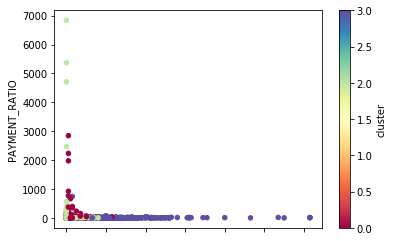

In [31]:
d = df1.plot.scatter(x='CASH_ADVANCE_TRX', y='PAYMENT_RATIO', c='cluster', cmap='Spectral')
d.set_xlabel('CASH_ADVANCE_TRX')
d.set_ylabel('PAYMENT_RATIO')

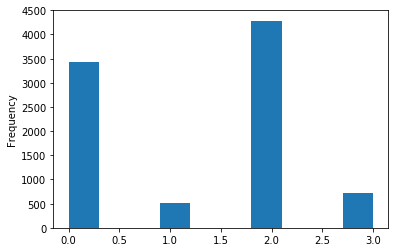

In [32]:
df1['cluster'].plot.hist()

In [33]:
l = df1.groupby('cluster').mean()

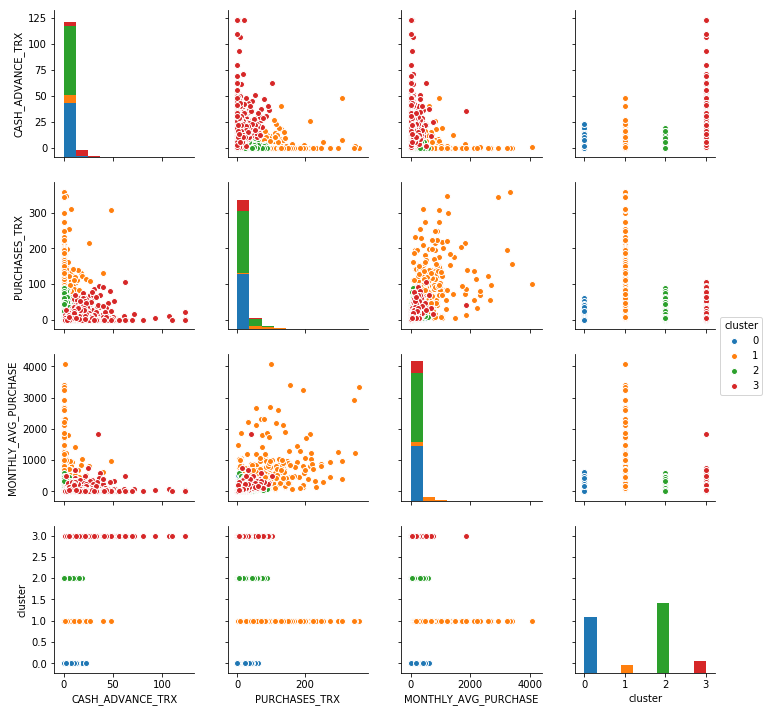

In [36]:
import seaborn as sns
sns.pairplot(df1.iloc[:,[0, 1, 2, 9]], hue='cluster')

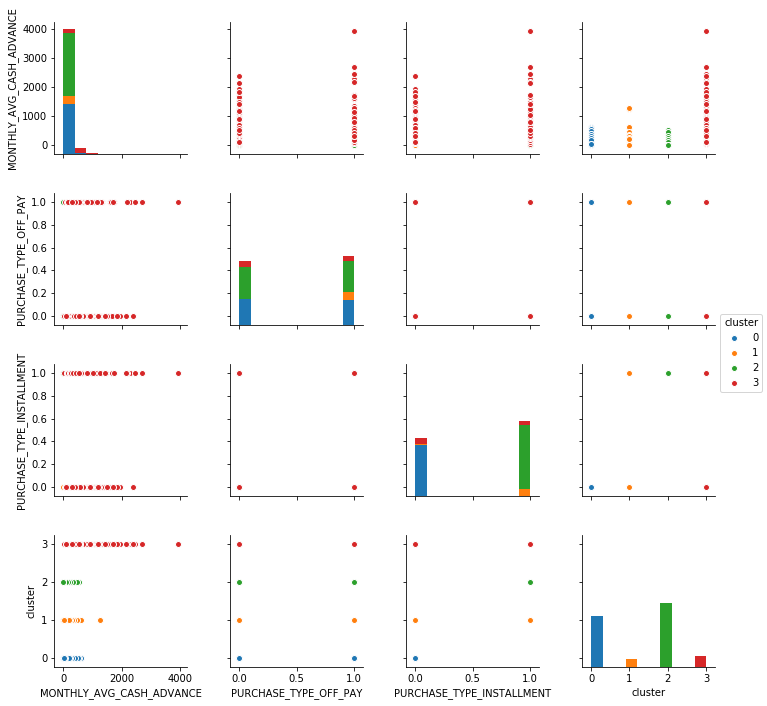

In [37]:
import seaborn as sns
sns.pairplot(df1.iloc[:,[3, 4, 5, 9]], hue='cluster')

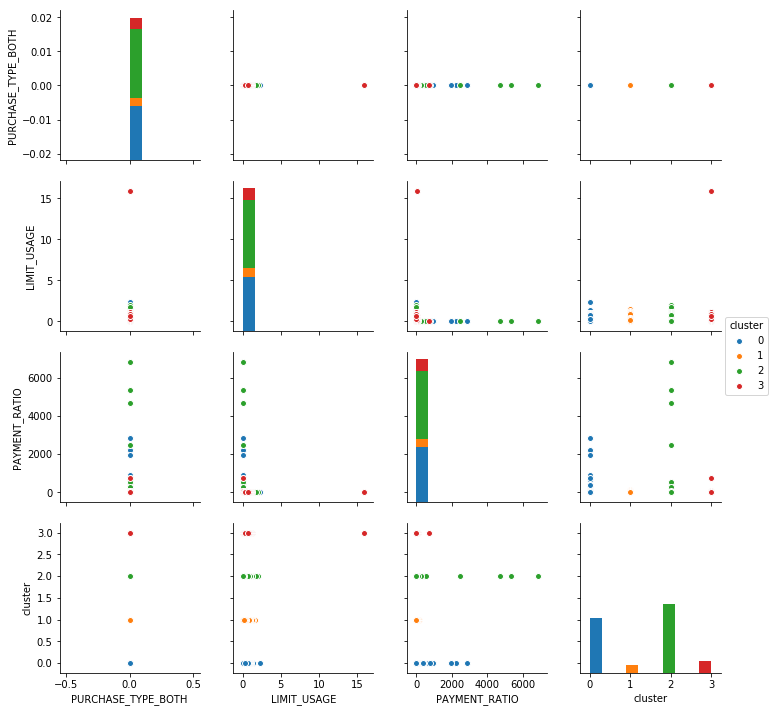

In [38]:
import seaborn as sns
sns.pairplot(df1.iloc[:,[6, 7, 8, 9]], hue='cluster')

In [39]:
abc = pd.read_csv('CC GENERAL.csv')
q = pd.concat([DataFrame(abc.iloc[:,0], columns=['CUST_ID']), df1], axis=1)

In [40]:
q.to_csv('grouped customers.csv', index=0)

# My insights from the segmentation

* Group 2 customers are doing very high value purchase
* Group 1 customers are taking more cash advance and doing average purchase with using more limit usage
* Group 0 & 2 prefer to pay the monthly bills as soon as possible.
* Group 2 customers prefer to purchase on off payment while group 0 customers prefer to purchase on installment

# Considered 4 groups because of highest silhoutte coefficient